In [1]:
import pandas as pd
import arviz as az
import numpy as np


<AxesSubplot:xlabel='stage', ylabel='q'>

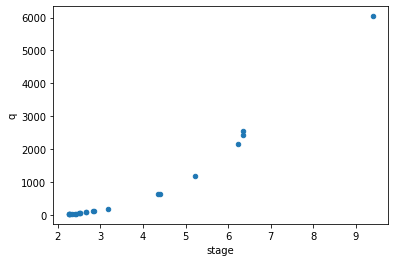

In [2]:
df = pd.read_csv('../data/provo_natural.csv')
df['log_q'] = np.log(df['q'])
df['log_s'] = np.log(df['stage'])

df.plot.scatter("stage","q")

In [3]:
#https://github.com/aesara-devs/aesara

In [4]:
h_o = np.array([0,0,1,4])
h_s = np.array([0,2,5])

def B(j, h, h_o, h_s):
    if h <= h_s[j-1]:
        return 0
    
    elif h <= h_s[j]:
        return np.log(h - h_o[j])# - np.log(h_s[j-1] - h_o[j]) #include these terms when i>1
    
    else:
        return np.log(h_s[j] - h_o[j]) #- np.log(h_s[j-1] - h_o[j])


In [5]:
B(1,1,h_o, h_s)

0.0

In [6]:
h_o = np.array([0,0,1,4])
h_s = np.array([0,2,5, np.inf])
lo = np.zeros(3)


lo[0] = np.NINF

#np.clip?

<AxesSubplot:xlabel='stage', ylabel='q'>

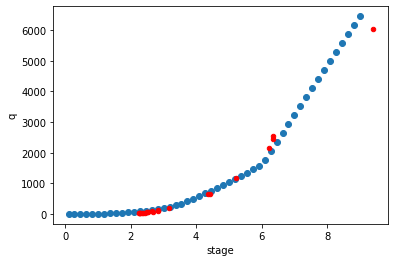

In [7]:
x = np.linspace(0.1,9)
import matplotlib.pyplot as plt

h_o = np.array([0,0,2.5,5])
h_s = np.array([0,3.5,6, np.inf])


y1 = np.array([B(1, i, h_o, h_s) for i in x])
y2 = np.array([B(2, i, h_o, h_s) for i in x])
y3 = np.array([B(3, i, h_o, h_s) for i in x])

fig, ax = plt.subplots()
ax.scatter(x,  np.exp(2+ 3*y1 + 1.3*y2 + 1*y3))

df.plot.scatter("stage","q", ax=ax, color='red')
#ax.scatter(x,y2)
#ax.scatter(x,y3)
#ax.set_ylim((-2,2))

In [8]:
import aesara.tensor as at
import numpy as np
from aesara import function

m = 3
lo = np.zeros(m)
lo[0] = np.NINF

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [9]:
h = np.linspace(0.1,10).reshape(-1,1)
h.shape

(50, 1)

/home/thodson/.local/miniconda3/envs/pymc/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


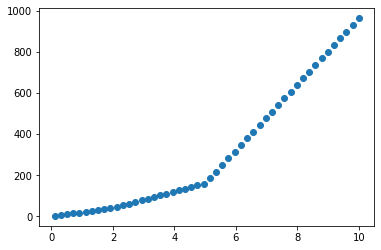

In [10]:
# XXX WORKING  SWITCH
a = 3
w = np.array([1,1,1])
h = np.linspace(0.1,10).reshape(-1,1)
h0 = np.array([[0,0,1,4]]).reshape(1,-1)
hs = np.array([0,2,5, np.inf]).reshape(1,-1)

bo = np.where( np.less_equal(h, hs[:,:-1]), 0, np.log(h-h0[:,1:]))
b1 = np.where( np.less_equal(h, hs[:,1:]), bo, np.log(hs[:,1:]-h0[:,1:]))
#b1


y = np.exp(a + np.dot(b1,w))
import matplotlib.pyplot as plt
plt.scatter(h,y)


/home/thodson/.local/miniconda3/envs/pymc/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


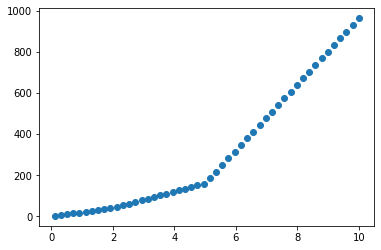

In [11]:
# XXX WORKING  SWITCH
a = 3
w = np.array([1,1,1])
h = np.linspace(0.1,10).reshape(-1,1)
h0 = np.array([[0,0,1,4]]).reshape(1,-1)
hs = np.array([0,2,5, np.inf]).reshape(1,-1)

bo = np.where( np.less_equal(h, hs[:,:-1]), 0, np.log(h-h0[:,1:]))
b1 = np.where( np.less_equal(h, hs[:,1:]), bo, np.log(hs[:,1:]-h0[:,1:]))
#b1


y = np.exp(a + np.dot(b1,w))
import matplotlib.pyplot as plt
plt.scatter(h,y)

In [12]:
# develop Basis function XXX swith
#theano.config.compute_test_value ='ignore'
import aesara.tensor as at
import aesara
#import theano
import numpy as np
a = 3
w = np.array([3,1.3,1])
#h = np.linspace(0.1,10).reshape(-1,1)
h0 = np.array([[0,0,1,4]]).reshape(1,-1)
hs = np.array([0,2,5, np.inf]).reshape(1,-1)
#h = at.dvector('h', shape=(50,1))
h = at.dcol('h')

bo = at.switch( at.le(h, hs[:,:-1]), 0, at.log(h-h0[:,1:]))
b1 = at.switch( at.le(h, hs[:,1:]), bo, at.log(hs[:,1:]-h0[:,1:]))

#Bo = at.switch( at.le(h, hs), 0, at.log(h - h0) )
#B = at.switch( at.gt(h, hs), Bo, at.log(hs - h0) )

B = aesara.function([h], b1)

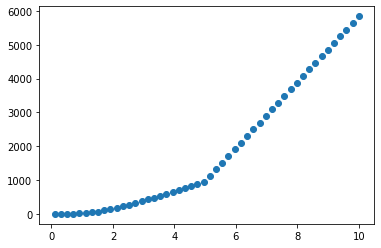

In [13]:
s = np.linspace(0.1,10).reshape(-1,1)
b = B(s)
a = 3
w = np.array([3,1.3,1])#.reshape(-1,1)

y = np.exp(a + np.dot(b,w.T))
x = np.linspace(0.1,10).reshape(-1,1)
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [14]:
# develop Basis function XXX swith
#theano.config.compute_test_value ='ignore'
import aesara.tensor as at
import aesara
#import theano
import numpy as np
a = 3
w = np.array([3,1.3,1])
#h = np.linspace(0.1,10).reshape(-1,1)
h0 = np.array([[0,0,1,4]]).reshape(1,-1)
hs = np.array([0,2,5, np.inf]).reshape(1,-1)
#h = at.dvector('h', shape=(50,1))
h = at.dcol('h')

bo = at.switch( at.le(h, hs[:,:-1]), 0, at.log(h-h0[:,1:]))
b1 = at.switch( at.le(h, hs[:,1:]), bo, at.log(hs[:,1:]-h0[:,1:]))

#Bo = at.switch( at.le(h, hs), 0, at.log(h - h0) )
#B = at.switch( at.gt(h, hs), Bo, at.log(hs - h0) )

B = aesara.function([h], b1)

In [16]:
B(s)

array([[-2.30258509,  0.        ,  0.        ],
       [-1.19719312,  0.        ,  0.        ],
       [-0.68501705,  0.        ,  0.        ],
       [-0.34796662,  0.        ,  0.        ],
       [-0.09633111,  0.        ,  0.        ],
       [ 0.10454386,  0.        ,  0.        ],
       [ 0.27173933,  0.        ,  0.        ],
       [ 0.41494385,  0.        ,  0.        ],
       [ 0.54018627,  0.        ,  0.        ],
       [ 0.65147448,  0.        ,  0.        ],
       [ 0.69314718,  0.11369305,  0.        ],
       [ 0.69314718,  0.27948531,  0.        ],
       [ 0.69314718,  0.42165979,  0.        ],
       [ 0.69314718,  0.54611397,  0.        ],
       [ 0.69314718,  0.65677954,  0.        ],
       [ 0.69314718,  0.75640938,  0.        ],
       [ 0.69314718,  0.84700627,  0.        ],
       [ 0.69314718,  0.93007287,  0.        ],
       [ 0.69314718,  1.00676549,  0.        ],
       [ 0.69314718,  1.077993  ,  0.        ],
       [ 0.69314718,  1.14448274,  0.   

In [17]:
#B(s)

In [18]:
b1.shape

Shape.0

In [19]:
# develop Basis function XXX swith
import numpy as np
h0 = np.array([0,0,1,4])
hs = np.array([0,2,5, np.inf])
#h = at.dvector('h')

Bo = at.switch( at.le(h, hs), 0, at.log(h - h0) )
B = at.switch( at.gt(h, hs), Bo, at.log(hs - h0) )

basis = aesara.function([h], B)

/home/thodson/.local/miniconda3/envs/pymc/lib/python3.7/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [20]:
# develop Basis function with clip

In [21]:
%load_ext autoreload
%autoreload 2

In [22]:
import arviz as az
from ratingcurve.ratingmodel import SegmentRatingModelOLD, SegmentRatingModel
import pymc as pm
from pymc import Model

ModuleNotFoundError: No module named 'ratingcurve'

In [23]:
#import theano.tensor as tt

In [24]:
#with Model() as model:
    
#    hs = pm.Normal('test',mu=1, sd=1, shape=2)
    #hs = at.stack([at.as_tensor_variable(h_s_prior)])

In [25]:
#mu = np.array([0.0,2.0,5.0,200.0]).reshape(-1,1)
#sig = np.array([1.0,1.0,1.0,0.1]).reshape(-1,1)

#test = pm.Normal.dist(mu=mu, sigma=sig)

<AxesSubplot:xlabel='stage', ylabel='q'>

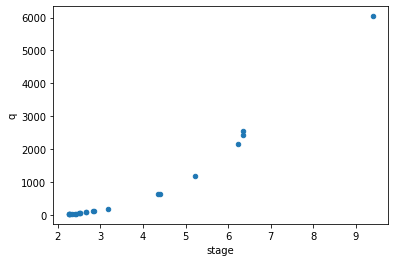

In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/provo_natural.csv')
df['log_q'] = np.log(df['q'])
df['log_s'] = np.log(df['stage'])

df.plot.scatter("stage","q")

In [27]:
#import theano.tensor as at
#test = pm.Normal.dist( mu=0, sigma=1)
##at.stack([test,0.0])
#pm.math.concatenate([test, 0.0], axis=0)

In [28]:
test = SegmentRatingModelOLD(df['q'].values.reshape(1,-1),
                          df['stage'].values.reshape(1,-1),
                          breaks=np.array([0.0,2.0,5.0]),
                          breaks_sigma=np.array([1.0,1.0,1.0]))

NameError: name 'SegmentRatingModelOLD' is not defined

In [29]:
test = SegmentRatingModel(df['q'],
                          df['stage'],
                          breaks=np.array([0.0,2.0,5.0]),
                          breaks_sigma=np.array([1.0,1.0,1.0]))


NameError: name 'SegmentRatingModel' is not defined

In [30]:
h = np.linspace(0.1,10).reshape(-1,1)
h.shape

(50, 1)

In [31]:
df['stage'].values.shape

(22,)

In [32]:
y = np.concatenate([x,[0.0]])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [33]:
x.append(1.2)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [34]:
t = pm.Normal.dist(mu=np.array([1,2]).reshape(-1,1), sigma=np.array([1,2]).reshape(-1,1))

NameError: name 'pm' is not defined

In [35]:
t = pm.Normal.dist

NameError: name 'pm' is not defined

In [36]:
######### SCRASTCH
q_obs = df['q']
q_transform = LogZTransform(q_obs)
y = q_transform.transform(q_obs)
    
h_obs = df['stage']

NameError: name 'LogZTransform' is not defined

In [37]:
# XXXXXXX TODO START HERE
# develop Basis function XXX swith
#theano.config.compute_test_value ='ignore'
import aesara.tensor as at
import aesara
#import theano
import numpy as np
a = -1
w = np.array([2.3,2.1,1.3])

h0 = np.array([-3,1,4]).reshape(1,-1)
hs = np.array([-3,2,5,np.inf]).reshape(1,-1)

h = at.dcol('h')

#bo = at.switch( at.le(h, hs[:,:-1]), 0, at.log(h-h0[:,1:]))
#b1 = at.switch( at.le(h, hs[:,1:]), bo, at.log(hs[:,1:]-h0[:,1:]))
b0 = at.switch( at.le(h, hs[:,:-1]), np.array([np.NINF,0,0]), at.log(h-h0))
b1 = at.switch( at.le(h, hs[:,1:]), b0, at.log(hs[:,1:]-h0))
B = aesara.function([h], b1)


#q = at.switch( at.le(h, h0[0]), 0.0, at.exp(a + at.dot(B(h),w.T)) )
#q = at.switch( at.le(h, h0[0]), 0.0, at.exp( at.dot(b1, w.T)) )
#Q = aesara.function([h], q)

                    
#Bo = at.switch( at.le(h, hs), 0, at.log(h - h0) )
#B = at.switch( at.gt(h, hs), Bo, at.log(hs - h0) )

#B = aesara.function([h], b1)


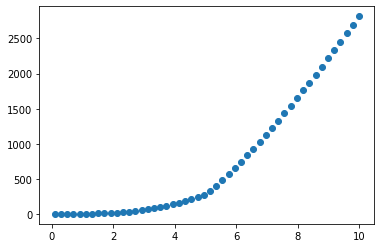

In [38]:
s = np.linspace(0.1,10).reshape(-1,1)
b = B(s)
b
#Q(s)
#B(s)
plt.scatter(s, at.exp(a + at.dot(b, w.T)).eval())

In [39]:
#test = at.grad(at.switch( at.le(h, hs[:,:-1]), np.array([np.NINF,0,0]), at.log(h-h0)), h)

In [40]:
import aesara.tensor as tt
import aesara
from aesara import pp
x = tt.dscalar('x')
y = x ** 2
gy = tt.grad(y, x)
pp(gy)  # print out the gradient prior to optimization

'((fill((x ** 2), 1.0) * 2) * (x ** (2 - 1)))'

In [41]:
at.exp(a + at.dot(b, w.T)).eval()

array([   4.96406448,    5.73991054,    6.58000484,    7.48550277,
          8.45751398,    9.49710646,   10.60531023,   11.78312042,
         13.03150001,   14.35138225,   18.92459889,   26.80601599,
         36.13250104,   46.92480995,   59.20134286,   72.97864696,
         88.27177179,  105.09452975,  123.45969323,  143.37914736,
        164.864011  ,  187.92473418,  212.57117775,  238.81267948,
        266.6581094 ,  328.90497375,  405.859011  ,  486.35016613,
        570.04836281,  656.68970639,  746.05759163,  837.97050594,
        932.27377326, 1028.83374939, 1127.53361198, 1228.27022658,
       1330.95176182, 1435.49583978, 1541.82807772, 1649.88092156,
       1759.59270075, 1870.90685376, 1983.77128677, 2098.13783796,
       2213.96182594, 2331.20166651, 2449.81854492, 2569.77613393,
       2691.04034969, 2813.57913945])

In [42]:
at.exp(a + at.dot(b, w.T)).eval()

array([   4.96406448,    5.73991054,    6.58000484,    7.48550277,
          8.45751398,    9.49710646,   10.60531023,   11.78312042,
         13.03150001,   14.35138225,   18.92459889,   26.80601599,
         36.13250104,   46.92480995,   59.20134286,   72.97864696,
         88.27177179,  105.09452975,  123.45969323,  143.37914736,
        164.864011  ,  187.92473418,  212.57117775,  238.81267948,
        266.6581094 ,  328.90497375,  405.859011  ,  486.35016613,
        570.04836281,  656.68970639,  746.05759163,  837.97050594,
        932.27377326, 1028.83374939, 1127.53361198, 1228.27022658,
       1330.95176182, 1435.49583978, 1541.82807772, 1649.88092156,
       1759.59270075, 1870.90685376, 1983.77128677, 2098.13783796,
       2213.96182594, 2331.20166651, 2449.81854492, 2569.77613393,
       2691.04034969, 2813.57913945])

In [43]:
at.dot(b, w.T).eval()

array([2.60222486, 2.74744362, 2.88403548, 3.01296819, 3.13505527,
       3.25098717, 3.36135484, 3.46666803, 3.5673695 , 3.66384626,
       3.9404626 , 4.28862634, 4.58719277, 4.84854653, 5.08094423,
       5.29016689, 5.48042037, 5.65486023, 5.81591473, 5.9654925 ,
       6.10512096, 6.23604153, 6.35927689, 6.47567948, 6.58596735,
       6.79576888, 7.00600584, 7.18692887, 7.3457212 , 7.48721162,
       7.6148028 , 7.7309829 , 7.83762652, 7.93618116, 8.02778788,
       8.11336214, 8.19364958, 8.2692656 , 8.34072405, 8.4084584 ,
       8.47283764, 8.53417854, 8.592755  , 8.64880549, 8.70253887,
       8.75413915, 8.80376924, 8.85157407, 8.89768314, 8.94221267])

<AxesSubplot:xlabel='stage', ylabel='q'>

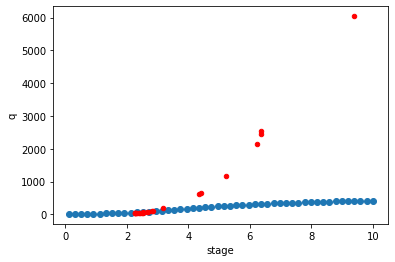

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/provo_natural.csv')
df['log_q'] = np.log(df['q'])
df['log_s'] = np.log(df['stage'])



s = np.linspace(0.1,10).reshape(-1,1)
b = B(s)
a = 0
w = np.array([2.3,1.3,0.3])#.reshape(-1,1)

y = np.exp(a + np.dot(b,w.T))
x = np.linspace(0.1,10).reshape(-1,1)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x,y)

df.plot.scatter("stage","q", color='red', ax=ax)

In [45]:
np.dot(b, w.T)

array([2.60222486, 2.74744362, 2.88403548, 3.01296819, 3.13505527,
       3.25098717, 3.36135484, 3.46666803, 3.5673695 , 3.66384626,
       3.84950816, 4.0650381 , 4.24986493, 4.41165536, 4.5555206 ,
       4.68503939, 4.80281535, 4.91080193, 5.01050234, 5.1030981 ,
       5.18953476, 5.27058083, 5.34686939, 5.41892813, 5.48720158,
       5.54608453, 5.59460075, 5.63635222, 5.6729966 , 5.70564824,
       5.73509235, 5.76190315, 5.78651321, 5.80925659, 5.8303966 ,
       5.85014451, 5.86867238, 5.88612223, 5.90261264, 5.91824365,
       5.9331004 , 5.94725599, 5.96077363, 5.97370836, 5.98610837,
       5.99801613, 6.00946923, 6.02050111, 6.03114167, 6.04141771])

In [49]:
import pymc as pm
from pymc import Model
from transforms import LogZTransform
#import theano.tensor as at
#import theano
#from theano.compile.io import In
#import theano

import aesara
import aesara.tensor as at

q_obs = df['q'].values.reshape(-1,1)
q_transform = LogZTransform(q_obs)
y = q_transform.transform(q_obs)

#breaks = np.array([0.0,2.0,5.0])
#breaks_sigma = np.array([1.0,1.0,1.0])
breaks = np.array([0.0])
breaks_sigma = np.array([1.0])

COORDS = {"obs" : np.arange(len(y)), "splines":np.arange(len(breaks))}
#self.add_coords(COORDS)

with Model(coords=COORDS) as test:

    #TODO CREATE DATA VARIABLE
    h_obs = df['stage'].values.reshape(-1,1)
    
    h0_offset = np.ones_like(breaks)
    h0_offset[0] = 0
    
    #PRIORS
    w = pm.HalfCauchy("w", beta=5, dims="splines")
    a = pm.Normal("a", mu=0, sigma=10)
    hs = pm.Normal("hs", mu=breaks, sigma=breaks_sigma, shape=breaks.shape)
    
    #hs = at.stack([
    #hs = np.array([0,1,4]) #works
    
    # MODEL
    h0 = hs - h0_offset
    h = at.dcol('h')
    b0 = at.switch( at.le(h, hs), 0.0, at.log(h-h0))
    b1 = at.switch( at.gt(h, hs), b0, at.log(hs-h0))
    B = aesara.function([h], b1) #XXX WARNING DOES NOT COMPUTE GRADIENT
    
    mu = pm.Deterministic("mu", a + at.dot(B(h_obs), w.T))
    sigma = pm.HalfCauchy("sigma", beta=1)
    D = pm.Normal("D", mu, sigma, observed=y.flatten(), dims="obs") #TODO check flatten

    

In [47]:
# Compiles but bad
with test:
    trace = pm.sample(tune=2000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/thodson/.local/miniconda3/envs/pymc/lib/python3.7/site-packages/pymc/aesaraf.py:1010: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  **kwargs,
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, a, hs, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 19 seconds.


In [327]:
# 5/3/2022 XXX USE
breaks = np.array([2.0])
h0 = at.constant([2.0])
hs = at.constant([2.0])

ninf = at.constant([np.NINF])
inf = at.constant([np.inf])

clips_array = np.zeros_like(breaks)
clips_array[0] = np.NINF
clips = at.constant(clips_array)

hsi = at.concatenate([hs, inf])[1:]
b0 = at.switch( at.le(h, hs), clips, at.log(h-h0))
b1 = at.switch( at.le(h, hsi), b0, at.log(hsi-h0))
B = aesara.function([h], b1)
BX = aesara.function([h], b0)

In [211]:
#clips = at.zeros_like(hs)
#hs[0] = 10
clips_array = np.zeros_like(breaks)
clips_array[0] = np.NINF
clips = at.constant(clips_array)
#clips = at.constant([i for i in np.arange(len(hs.eval()))])
clips.eval()

array([-inf])

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/green_channel.csv')
#df['log_q'] = np.log(df['q'])
#df['log_s'] = np.log(df['stage'])

In [50]:
# COMPILED BUT STILL BAD
import pymc as pm
from pymc import Model
from transforms import LogZTransform

import aesara
import aesara.tensor as at

h_obs = df['stage'].values.reshape(-1,1)
    
q_obs = df['q'].values.reshape(-1,1)
q_transform = LogZTransform(q_obs)
y = q_transform.transform(q_obs)

#breaks = np.array([0.0,2.0,5.0])
#breaks_sigma = np.array([1.0,1.0,1.0])
breaks = np.array([0.0])
breaks_sigma = np.array([1.0])

ninf = at.constant([np.NINF])
inf = at.constant([np.inf])

clips_array = np.zeros_like(breaks)
clips_array[0] = np.NINF
clips = at.constant(clips_array) # TODO could be a problem with clips?

COORDS = {"obs" : np.arange(len(y)), "splines":np.arange(len(breaks))}
#self.add_coords(COORDS)

with Model(coords=COORDS) as test:

    #TODO CREATE DATA VARIABLE

    
    h0_offset = np.ones_like(breaks)
    h0_offset[0] = 0 #
    
    #PRIORS
    w = pm.HalfCauchy("w", beta=3, dims="splines")
    a = pm.Normal("a", mu=0, sigma=10)
    hs = pm.Normal("hs", mu=breaks, sigma=breaks_sigma, dims="splines") #shape=breaks.shape[0])
    
    #hs = pm.Exponential("hs", breaks, dims="splines")
    

    hsi = at.concatenate([hs, inf])[1:]
    
    
    # MODEL
    h0 = hs - h0_offset #XXX check this. should it be a tensor?
    h = at.dcol('h')

    b0 = at.switch( at.le(h, hs), clips , at.log(h-h0))
    b1 = at.switch( at.le(h, hsi), b0, at.log(hsi-h0))
    #b0 = at.switch( at.le(h, hs), clips , at.log(h-hs))
    #b1 = at.switch( at.le(h, hsi), b0, at.log(hsi-hs))
    B = aesara.function([h], b1) #b1
    
    mu = pm.Deterministic("mu", a + at.dot(B(h_obs), w.T))
    sigma = pm.HalfCauchy("sigma", beta=1)
    D = pm.Normal("D", mu, sigma, observed=y.flatten(), dims="obs") #TODO check flatten

In [51]:
# CompileD XXXX
with test:
    trace = pm.sample(tune=2000, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/thodson/.local/miniconda3/envs/pymc/lib/python3.7/site-packages/pymc/aesaraf.py:1010: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  **kwargs,
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, a, hs, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 13 seconds.


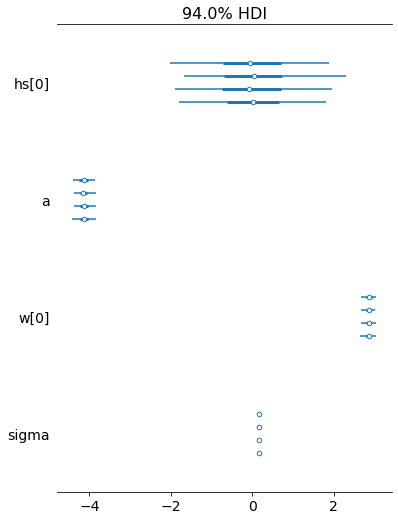

In [52]:
import arviz as az

az.plot_forest(trace, var_names=["hs","a","w","sigma"], combined=False);

In [53]:
# COMPILED without aesara.function AND WORKS!!!!!!!!
import pymc as pm
from pymc import Model
from transforms import LogZTransform

import aesara
import aesara.tensor as at

h_obs = df['stage'].values.reshape(-1,1)
    
q_obs = df['q'].values.reshape(-1,1)
q_transform = LogZTransform(q_obs)
y = q_transform.transform(q_obs)

breaks = np.array([0.0,7.0])
#breaks_sigma = np.array([1.0,1.0,1.0])
breaks_sigma = np.array([0.1,0.1])
#breaks = np.array([0.0])
#breaks_sigma = np.array([1.0])

ninf = at.constant([np.NINF])
inf = at.constant([np.inf])

clips_array = np.zeros_like(breaks)
clips_array[0] = np.NINF
clips = at.constant(clips_array) # TODO could be a problem with clips?

COORDS = {"obs" : np.arange(len(y)), "splines":np.arange(len(breaks))}
#self.add_coords(COORDS)

with Model(coords=COORDS) as test:

    #TODO CREATE DATA VARIABLE

    
    h0_offset = np.ones_like(breaks)
    h0_offset[0] = 0 #
    
    #PRIORS
    w = pm.HalfCauchy("w", beta=3, dims="splines")
    a = pm.Normal("a", mu=0, sigma=10)
    hs = pm.Normal("hs", mu=breaks, sigma=breaks_sigma, dims="splines") #shape=breaks.shape[0])
    
    #hs = pm.Exponential("hs", breaks, dims="splines")
    

    hsi = at.concatenate([hs, inf])[1:]
    
    
    # MODEL
    h0 = hs - h0_offset #XXX check this. should it be a tensor?
    #h = at.dcol('h')

    b0 = at.switch( at.le(h_obs, hs), clips , at.log(h_obs-h0))
    b1 = at.switch( at.le(h_obs, hsi), b0, at.log(hsi-h0))
    #b0 = at.switch( at.le(h, hs), clips , at.log(h-hs))
    #b1 = at.switch( at.le(h, hsi), b0, at.log(hsi-hs))
    #B = aesara.function([h], b1) #b1
    
    mu = pm.Deterministic("mu", a + at.dot(b1, w.T))
    sigma = pm.HalfCauchy("sigma", beta=1)
    D = pm.Normal("D", mu, sigma, observed=y.flatten(), dims="obs") #TODO check flatten

In [54]:
# CompileD XXXX
with test:
    trace = pm.sample(tune=2000, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/thodson/.local/miniconda3/envs/pymc/lib/python3.7/site-packages/pymc/aesaraf.py:1010: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  **kwargs,
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, a, hs, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 25 seconds.


In [398]:
#trace.posterior['hs'].mean(axis=1)

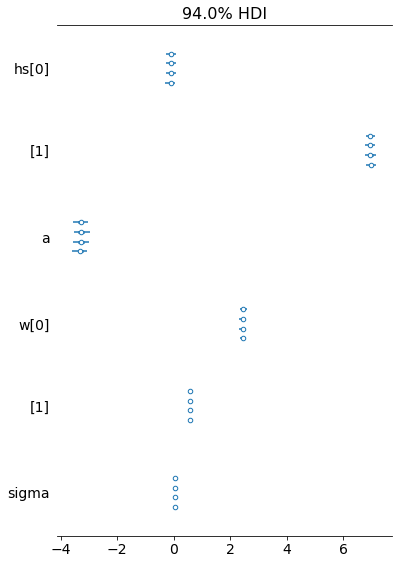

In [403]:
import arviz as az

az.plot_forest(trace, var_names=["hs","a","w","sigma"], combined=False);

In [66]:
#with test:
#    mean_field = pm.fit(method="advi")

In [60]:
# other priors
# physixal exponents (w)
import pymc as pm
from pymc import Model
from transforms import LogZTransform

import aesara
import aesara.tensor as at

h_obs = df['stage'].values.reshape(-1,1)
    
q_obs = df['q'].values.reshape(-1,1)
q_transform = LogZTransform(q_obs)
y = q_transform.transform(q_obs)

breaks = np.array([0.0,7.0])
#breaks_sigma = np.array([1.0,1.0,1.0])
breaks_sigma = np.array([0.1,0.1])
#breaks = np.array([0.0])
#breaks_sigma = np.array([1.0])

#ninf = at.constant([np.NINF])
ninf = at.constant([-99999.0])
inf = at.constant([np.inf])

clips_array = np.zeros_like(breaks)
clips_array[0] = np.NINF
clips = at.constant(clips_array) # TODO could be a problem with clips?

COORDS = {"obs" : np.arange(len(y)), "splines":np.arange(len(breaks))}
#self.add_coords(COORDS)

with Model(coords=COORDS) as test:

    #TODO CREATE DATA VARIABLE

    
    h0_offset = np.ones_like(breaks)
    h0_offset[0] = 0 #
    
    #PRIORS
    w = pm.HalfCauchy("w", beta=3, dims="splines")
    a = pm.Normal("a", mu=0, sigma=10)
    hs = pm.Normal("hs", mu=breaks, sigma=breaks_sigma, dims="splines") #shape=breaks.shape[0])
    
    #hs = pm.Exponential("hs", breaks, dims="splines")
    

    hsi = at.concatenate([hs, inf])[1:]
    
    
    # MODEL
    h0 = hs - h0_offset #XXX check this. should it be a tensor?
    #h = at.dcol('h')

    b0 = at.switch( at.le(h_obs, hs), clips , at.log(h_obs-h0))
    b1 = at.switch( at.le(h_obs, hsi), b0, at.log(hsi-h0))
    #b0 = at.switch( at.le(h, hs), clips , at.log(h-hs))
    #b1 = at.switch( at.le(h, hsi), b0, at.log(hsi-hs))
    #B = aesara.function([h], b1) #b1
    
    mu = pm.Deterministic("mu", a + at.dot(b1, w.T))
    sigma = pm.HalfCauchy("sigma", beta=1)
    D = pm.Normal("D", mu, sigma, observed=y.flatten(), dims="obs") #TODO check flatten

In [ ]:
# CompileD XXXX
with test:
    trace = pm.sample(tune=2000, target_accept=0.9)

In [ ]:
az.plot_posterior(mean_field.sample(1000), color="LightSeaGreen");

In [341]:
# CompileD XXXX
with test:
    trace = pm.sample(tune=2000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/thodson/.local/miniconda3/envs/pymc/lib/python3.7/site-packages/pymc/aesaraf.py:1010: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  **kwargs,
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, a, hs, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 49 seconds.


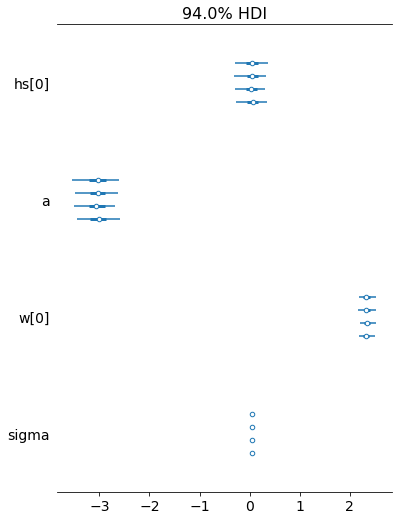

In [343]:
import arviz as az

az.plot_forest(trace, var_names=["hs","a","w","sigma"], combined=False);

In [ ]:
# SCRATCH